In [26]:
import numpy as np

environment_rows = 5
environment_cols = 5

# Creating a 3D numpy array to hold current Q-values for each state and action pair: Q(s, a)
# q_values = np.zeros((environment_rows, environment_cols, 4))

import numpy as np
class QTable:
    def __init__(self, environment_rows, environment_cols, num_actions, learning_rate, discount_factor):
        self.environment_rows = environment_rows
        self.environment_cols = environment_cols
        self.num_actions = num_actions
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.q_table = np.zeros((environment_rows,environment_cols, num_actions))
    
    # Getting Q value at certain state and action
    def get_q_value(self, environment_rows, environment_cols, action):
        return self.q_table[environment_rows, environment_cols, action]
    
    # Updating Q table using the Bellman Equation
    def update_q_value(self, environment_rows, environment_cols, action, reward, next_row, next_col):
        current_q_value = self.q_table[environment_rows, environment_cols, action]
        max_next_q_value = np.max(self.q_table[next_row, next_col])
        new_q_value = (1 - self.learning_rate) * current_q_value + self.learning_rate * (reward + self.discount_factor * max_next_q_value)
        self.q_table[environment_rows, environment_cols, action] = new_q_value
    
    # Printing Q-table
    def print_q_table(self):
        print("Q-table:")
        print("State    |   N       E       S       W")
        print("----------------------------------------")
        for row in range(self.environment_rows):
            for col in range(self.environment_cols):
                print(f"({row},{col})   | ", end="")
                for action in actions:  # Iterate over 'actions' instead of 'self.num_actions'
                    action_idx = actions.index(action)
                    q_value_str = f"{self.q_table[row, col, action_idx]:.2f}"  
                    padding = max(0, 7 - len(q_value_str))  
                    print(" " * (padding // 2) + q_value_str + " " * ((padding + 1) // 2), end="")
                print()


# numeric action codes: 0 = N, 1 = E, 2  = S, 3 = W
actions = ['N', 'E', 'S','W']

In [27]:
# Defining environment
rewards = np.full((environment_rows, environment_cols), -1)

rewards[0,0] = 10
rewards[1,1] = -10
rewards[2,0] = -10

for row in rewards:
    print(row)

[10 -1 -1 -1 -1]
[ -1 -10  -1  -1  -1]
[-10  -1  -1  -1  -1]
[-1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1]


Note: Q-values represent our current estimate of the sum of all future rewards if we were to take a particular action in a particular state

In [35]:
# determines if specific location is a terminal state
def is_terminal(cur_row_idx, cur_col_idx):
    # if the reward is -1 then it is not a terminal state
    if rewards[cur_row_idx, cur_col_idx] == -1: return False
    else: return True

# Epsilon greedy algorithm that will choose which acion to take next
def get_next_action(q_values, cur_row_idx, cur_col_idx, epsilon):
    # if a randomly chosen value between 0 and 1 is less than epsilon, choose most promising value from Q-table for this state [90%]
    if np.random.random() < epsilon:
        return np.argmax(q_values.q_table[cur_row_idx, cur_col_idx])
    else: # choose random action for exploration
        return np.random.randint(4)
    
# Get next location based on chosen action
def get_next_location(cur_row_idx, cur_col_idx, action_idx):
    new_row_idx = cur_row_idx
    new_col_idx = cur_col_idx
    if actions[action_idx] == 'N' and cur_row_idx > 0:
        new_row_idx -= 1
    elif actions[action_idx] == 'E' and cur_col_idx < environment_cols - 1:
        new_col_idx += 1
    elif actions[action_idx] == 'S' and cur_row_idx < environment_rows - 1:
        new_row_idx += 1
    elif actions[action_idx] == 'W' and cur_col_idx > 0:
        new_col_idx -= 1
    return new_row_idx, new_col_idx

#Get the shortest path between any location within the space that the agent is allowed to travel and the item packaging location.
def get_shortest_path(q_values, start_row_index, start_column_index):
  #return immediately if this is an invalid starting location
  if not is_terminal(start_row_index, start_column_index):  # Inverted the condition
        return []
  else: #if this is a 'legal' starting location
      current_row_index, current_column_index = start_row_index, start_column_index
      shortest_path = []
      shortest_path.append([current_row_index, current_column_index])
      #continue moving along the path until we reach the goal (i.e., the item packaging location)
      while not is_terminal(current_row_index, current_column_index):
          #get the best action to take
          action_index = get_next_action(q_values, current_row_index, current_column_index, 1.)
          #move to the next location on the path, and add the new location to the list
          current_row_index, current_column_index = get_next_location(q_values, current_row_index, current_column_index, action_index)
          shortest_path.append([current_row_index, current_column_index])
      return shortest_path
  
  #define a function that will choose a random, non-terminal starting location
def get_starting_location():
  #get a random row and column index
  current_row_index = np.random.randint(environment_rows)
  current_column_index = np.random.randint(environment_cols)
  #continue choosing random row and column indexes until a non-terminal state is identified
  #(i.e., until the chosen state is a 'white square').
  while is_terminal(current_row_index, current_column_index):
    current_row_index = np.random.randint(environment_rows)
    current_column_index = np.random.randint(environment_cols)
  return current_row_index, current_column_index

In [36]:
#define training parameters
epsilon = 0.9 #the percentage of time when we should take the best action (instead of a random action)
discount_factor = 0.9 #discount factor for future rewards
learning_rate = 0.9 #the rate at which the AI agent should learn

q_values = QTable(environment_rows,environment_cols, 4, learning_rate,discount_factor)

#run through 1000 training episodes
for episode in range(1000):
  #get the starting location for this episode
  row_index, column_index = get_starting_location()

  #continue taking actions (i.e., moving) until we reach a terminal state
  #(i.e., until we reach the item packaging area or crash into an item storage location)
  while not is_terminal(row_index, column_index):
    #choose which action to take (i.e., where to move next)
    action_index = get_next_action(q_values, row_index, column_index, epsilon)

    #perform the chosen action, and transition to the next state (i.e., move to the next location)
    old_row_index, old_column_index = row_index, column_index #store the old row and column indexes
    row_index, column_index = get_next_location(row_index, column_index, action_index)
    
    #receive the reward for moving to the new state, and calculate the temporal difference
    reward = rewards[row_index, column_index]
    # old_q_value = q_values[old_row_index, old_column_index, action_index]
    # temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value

    #update the Q-value for the previous state and action pair
    # new_q_value = old_q_value + (learning_rate * temporal_difference)
    # q_values[old_row_index, old_column_index, action_index] = new_q_value
    q_values.update_q_value(old_row_index, old_column_index, action_index, reward, row_index, column_index)

print('Training complete!')

Training complete!


In [41]:
print(get_shortest_path(q_values, 4, 4))

[]


In [40]:
q_values.print_q_table()

Q-table:
State    |   N       E       S       W
----------------------------------------
(0,0)   |  0.00   0.00   0.00   0.00  
(0,1)   |  8.00   6.20  -10.00  10.00 
(0,2)   |  6.20   4.58   4.58   8.00  
(0,3)   |  4.58   3.07   3.12   6.20  
(0,4)   |  3.06   -3.14  1.31   4.58  
(1,0)   |  10.00  0.00   -9.00  7.20  
(1,1)   |  0.00   0.00   0.00   0.00  
(1,2)   |  6.20   3.12   3.12  -10.00 
(1,3)   |  4.52   1.38   1.44   4.58  
(1,4)   |  -3.14  1.37   0.63   3.12  
(2,0)   |  0.00   0.00   0.00   0.00  
(2,1)   |  -9.99  3.12   0.63  -10.00 
(2,2)   |  4.58   1.81   1.81   1.81  
(2,3)   |  3.12   0.63   0.63   3.12  
(2,4)   |  1.81   0.63   -0.43  1.81  
(3,0)   |  -9.00  0.63   -1.39  -0.47 
(3,1)   |  1.81   1.81   -0.43  -0.46 
(3,2)   |  3.12   0.63   0.59   0.62  
(3,3)   |  1.81   -0.47  -0.47  1.81  
(3,4)   |  0.63   -0.47  -1.39  0.63  
(4,0)   |  -0.43  -0.77  -1.42  -1.39 
(4,1)   |  0.63   -3.77  -3.86  -1.42 
(4,2)   |  1.81   -0.47  0.62   -0.77 
(4,3)   |  0.6

In [4]:
import numpy as np

q_values = np.array([
    [[  0,   80,   90,   80],
     [ 70,   90,   90,   70],
     [ 80,   90,   90,   80],
     [ 70,   90,   80,   70],
     [ 80,   90,   90,  100]],

    [[ 80,   90,   90,   70],
     [ 80,   90,   90,   70],
     [ 70,   90,   90,   70],
     [ 70,   90,   80,   80],
     [ 80,   80,   90,   70]],

    [[ 80,   90,   80,   90],
     [ 90,   90,   90,   80],
     [ 70,   90,   80,   80],
     [ 80,   80,   80,   90],
     [ 80,   80,   90,   70]],

    [[ 80,   90,   90,   80],
     [ 90,   80,   80,   90],
     [ 90,   80,   90,   80],
     [ 70,   80,   90,   80],
     [ 80,   80,   90,   70]],

    [[ 90,   90,   90,   90],
     [ 90,   90,   90,   90],
     [ 90,   90,   90,   90],
     [ 90,   90,   90,   90],
     [ 70,   80,   90,   70]]])

row = 0
col = 0
path = [(row, col)]
while not (row == 4 and col == 4):
    print("Current position:", row, col)
    print("Q-values:", q_values[row, col])
    max_q_value = np.max(q_values[row, col])
    print(max_q_value)
    # idx = np.argwhere(q_values[row, col] == max_q_value)
    idx = np.argmax(q_values[row, col])
    print("Indexes with maximum Q-value:", idx)
    if idx >= 0:
        # numeric action codes: 0 = N, 1 = E, 2  = S, 3 = W
        if idx == 0:
            row -= 1
        elif idx == 1:
            col += 1
        elif idx == 2:
            row += 1
        elif idx == 3:
            col -= 1
        else:
            print("Error in direction")
            break
        if row > 4 or row < 0 or col < 0 or col > 4:
            print("Out of bounds")
            break
        else:
            path.append((row, col))
    else:
        print("No maximum Q-value found")
        break

print("Path:", path)
           

Current position: 0 0
Q-values: [ 0 80 90 80]
90
Indexes with maximum Q-value: 2
Current position: 1 0
Q-values: [80 90 90 70]
90
Indexes with maximum Q-value: 1
Current position: 1 1
Q-values: [80 90 90 70]
90
Indexes with maximum Q-value: 1
Current position: 1 2
Q-values: [70 90 90 70]
90
Indexes with maximum Q-value: 1
Current position: 1 3
Q-values: [70 90 80 80]
90
Indexes with maximum Q-value: 1
Current position: 1 4
Q-values: [80 80 90 70]
90
Indexes with maximum Q-value: 2
Current position: 2 4
Q-values: [80 80 90 70]
90
Indexes with maximum Q-value: 2
Current position: 3 4
Q-values: [80 80 90 70]
90
Indexes with maximum Q-value: 2
Path: [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4)]


In [5]:
import numpy as np

data_3d = np.array([[[0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
                     [0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
                     [0.00, 0.00, -0.51, 0.00, 0.00, -0.30],
                     [0.00, 0.00, -0.51, -0.66, 0.00, -0.30],
                     [6.63, 0.00, 0.07, -0.51, 0.00, 0.00]],

                    [[0.00, 0.00, -0.30, 0.00, 0.00, -0.30],
                     [0.00, 0.00, -0.30, 0.00, 0.00, -0.51],
                     [0.00, 0.00, -0.51, -0.55, -0.30, -0.70],
                     [6.67, 0.00, 0.00, 0.28, -0.58, -0.81],
                     [0.00, 0.00, -0.92, -0.76, -0.66, 0.00]],

                    [[0.00, 8.65, 0.29, 0.00, -0.30, 0.07],
                     [0.00, 0.00, -0.30, -0.51, 0.00, -0.55],
                     [0.00, 0.00, -0.76, 0.00, -0.66, -0.51],
                     [0.00, 0.00, -0.51, -0.30, -0.55, -0.70],
                     [0.00, 0.00, -0.83, -0.66, -0.83, 0.00]],

                    [[0.00, 0.00, -0.30, 0.00, -0.51, -0.30],
                     [0.00, 0.00, 0.00, -0.51, -0.51, -0.30],
                     [0.00, 0.00, -0.96, -0.30, -0.80, -0.55],
                     [0.00, 0.00, -0.73, -0.83, -0.73, -0.30],
                     [0.00, 3.90, -0.30, -0.76, -0.66, 0.00]],

                    [[0.00, 0.00, 0.00, 0.00, 0.00, -0.30],
                     [3.90, 0.00, 0.00, 0.00, -0.51, -0.51],
                     [0.00, 0.00, 0.00, -0.66, -0.66, -0.66],
                     [0.00, 0.00, 0.00, -0.30, -0.76, -0.51],
                     [0.00, 0.00, 0.00, -0.30, -0.51, 0.00]]])

row = 0
col = 2
idx = -1
path = [(row, col)]
while not (idx == 1):
    print("Current position:", row, col)
    print("Q-values:", data_3d[row, col])
    max_q_value = np.max(data_3d[row, col])
    print(max_q_value)
    # idx = np.argwhere(q_values[row, col] == max_q_value)
    idx = np.argmax(data_3d[row, col])
    print("Indexes with maximum Q-value:", idx)
    if idx >= 0:
       # numeric action codes: 2 = N, 3 = E, 4  = S, 5 = W
        if idx == 2:
            row -= 1
        elif idx == 3:
            col += 1
        elif idx == 4:
            row += 1
        elif idx == 5:
            col -= 1
        elif idx == 0 or idx == 1:
            print("Pickup or Dropoff")
            break
        else:
            print("Error in direction")
            break
        if row > 4 or row < 0 or col < 0 or col > 4:
            print("Out of bounds")
            break
        else:
            path.append((row, col))
    else:
        print("No maximum Q-value found")
        break

print("Path:", path)

Current position: 0 2
Q-values: [ 0.    0.   -0.51  0.    0.   -0.3 ]
0.0
Indexes with maximum Q-value: 0
Pickup or Dropoff
Path: [(0, 2)]


C:\Users\rsond\AppData\Local\Temp\ipykernel_25408\2045292755.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', 5)


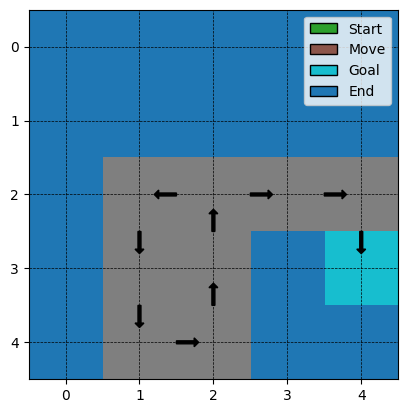

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the grid size
GRID_SIZE = 5

# Function to visualize the agent's path
def visualize_path(path):
    # Create a grid
    grid = np.zeros((GRID_SIZE, GRID_SIZE))

    # Mark starting point
    start = path[0]
    grid[start[0], start[1]] = 1

    # Mark ending point
    end = path[-1]
    grid[end[0], end[1]] = 2

    # Draw arrows and color cells
    for i in range(1, len(path)):
        prev_state = path[i-1]
        curr_state = path[i]
        dx = curr_state[1] - prev_state[1]
        dy = curr_state[0] - prev_state[0]
        if dx == 1:
            arrow = patches.Arrow(curr_state[1] - 0.5, curr_state[0], 0.3, 0, width=0.2, color='black')
            plt.gca().add_patch(arrow)
            grid[curr_state[0], curr_state[1]] = 3
        elif dx == -1:
            arrow = patches.Arrow(curr_state[1] + 0.5, curr_state[0], -0.3, 0, width=0.2, color='black')
            plt.gca().add_patch(arrow)
            grid[curr_state[0], curr_state[1]] = 3
        elif dy == 1:
            arrow = patches.Arrow(curr_state[1], curr_state[0] - 0.5, 0, 0.3, width=0.2, color='black')
            plt.gca().add_patch(arrow)
            grid[curr_state[0], curr_state[1]] = 3
        elif dy == -1:
            arrow = patches.Arrow(curr_state[1], curr_state[0] + 0.5, 0, -0.3, width=0.2, color='black')
            plt.gca().add_patch(arrow)
            grid[curr_state[0], curr_state[1]] = 3

    # Color the goal square based on the end coordinate of the path
    grid[end[0], end[1]] = 4

    # Set colors for visualization
    cmap = plt.cm.get_cmap('tab10', 5)

    # Visualize the grid
    plt.imshow(grid, cmap=cmap, interpolation='nearest')

    # Add gridlines
    plt.grid(visible=True, color='black', linestyle='--', linewidth=0.5)

    # Add legend
    legend_elements = [patches.Patch(facecolor=cmap(1), edgecolor='black', label='Start'),
                       patches.Patch(facecolor=cmap(2), edgecolor='black', label='Move'),
                       patches.Patch(facecolor=cmap(4), edgecolor='black', label='Goal'),
                       patches.Patch(facecolor=cmap(0), edgecolor='black', label='End')]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.show()

# Example path
# example_path = [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4)]
example_path = [(2,2),(2,1),(3,1), (4,1), (4,2), (3,2), (2,2), (2,3), (2,4), (3,4)]
visualize_path(example_path)


Red Agent Path

C:\Users\rsond\AppData\Local\Temp\ipykernel_25408\1984744966.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', 5)


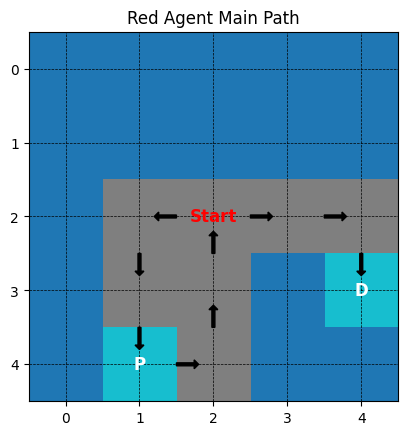

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the grid size
GRID_SIZE = 5

# Function to visualize the agent's path
def visualize_path(path):
    # Create a grid
    grid = np.zeros((GRID_SIZE, GRID_SIZE))

    # Mark starting point
    start = path[0]
    grid[start[0], start[1]] = 1

    # Draw arrows and color cells
    for i in range(1, len(path)):
        prev_state = path[i-1]
        curr_state = path[i]
        dx = curr_state[1] - prev_state[1]
        dy = curr_state[0] - prev_state[0]
        if dx == 1:
            arrow = patches.Arrow(curr_state[1] - 0.5, curr_state[0], 0.3, 0, width=0.2, color='black')
            plt.gca().add_patch(arrow)
            grid[curr_state[0], curr_state[1]] = 3
        elif dx == -1:
            arrow = patches.Arrow(curr_state[1] + 0.5, curr_state[0], -0.3, 0, width=0.2, color='black')
            plt.gca().add_patch(arrow)
            grid[curr_state[0], curr_state[1]] = 3
        elif dy == 1:
            arrow = patches.Arrow(curr_state[1], curr_state[0] - 0.5, 0, 0.3, width=0.2, color='black')
            plt.gca().add_patch(arrow)
            grid[curr_state[0], curr_state[1]] = 3
        elif dy == -1:
            arrow = patches.Arrow(curr_state[1], curr_state[0] + 0.5, 0, -0.3, width=0.2, color='black')
            plt.gca().add_patch(arrow)
            grid[curr_state[0], curr_state[1]] = 3

    # Mark additional points
    points = [(4, 1, 'P'), (3, 4, 'D')]
    for point in points:
        x, y, label = point
        grid[x, y] = 5
        # Change text color for points 'P' and 'D' to white
        text_color = 'white' if label in ['P', 'D'] else 'black'
        plt.text(y, x, label, fontsize=12, ha='center', va='center', color=text_color, weight = 'bold')

    # Add start point marker
    start_marker = patches.Circle((start[1], start[0]), radius=0.1, color='blue')
    # Add start point label
    plt.text(start[1], start[0], 'Start', fontsize=12, ha='center', va='center', color='red', weight = 'bold')

    # Set colors for visualization
    cmap = plt.cm.get_cmap('tab10', 5)

    # Visualize the grid
    plt.imshow(grid, cmap=cmap, interpolation='nearest')

    plt.title("Red Agent Main Path")

    # Add gridlines
    plt.grid(visible=True, color='black', linestyle='--', linewidth=0.5)

    plt.show()

# Example path
red_path = [(2,2),(2,1),(3,1), (4,1), (4,2), (3,2), (2,2), (2,3), (2,4), (3,4)]
visualize_path(red_path)



Blue Agent

C:\Users\rsond\AppData\Local\Temp\ipykernel_25408\2361792021.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', 5)


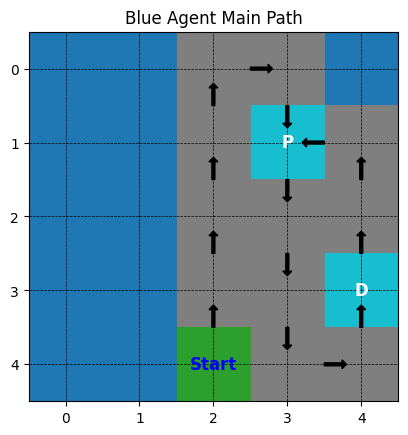

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the grid size
GRID_SIZE = 5

# Function to visualize the agent's path
def visualize_path(path):
    # Create a grid
    grid = np.zeros((GRID_SIZE, GRID_SIZE))

    # Mark starting point
    start = path[0]
    grid[start[0], start[1]] = 1

    # Draw arrows and color cells
    for i in range(1, len(path)):
        prev_state = path[i-1]
        curr_state = path[i]
        dx = curr_state[1] - prev_state[1]
        dy = curr_state[0] - prev_state[0]
        if dx == 1:
            arrow = patches.Arrow(curr_state[1] - 0.5, curr_state[0], 0.3, 0, width=0.2, color='black')
            plt.gca().add_patch(arrow)
            grid[curr_state[0], curr_state[1]] = 3
        elif dx == -1:
            arrow = patches.Arrow(curr_state[1] + 0.5, curr_state[0], -0.3, 0, width=0.2, color='black')
            plt.gca().add_patch(arrow)
            grid[curr_state[0], curr_state[1]] = 3
        elif dy == 1:
            arrow = patches.Arrow(curr_state[1], curr_state[0] - 0.5, 0, 0.3, width=0.2, color='black')
            plt.gca().add_patch(arrow)
            grid[curr_state[0], curr_state[1]] = 3
        elif dy == -1:
            arrow = patches.Arrow(curr_state[1], curr_state[0] + 0.5, 0, -0.3, width=0.2, color='black')
            plt.gca().add_patch(arrow)
            grid[curr_state[0], curr_state[1]] = 3

    # Mark additional points
    points = [(1, 3, 'P'), (3, 4, 'D')]
    for point in points:
        x, y, label = point
        grid[x, y] = 5
        # Change text color for points 'P' and 'D' to white
        text_color = 'white' if label in ['P', 'D'] else 'black'
        plt.text(y, x, label, fontsize=12, ha='center', va='center', color=text_color, weight = 'bold')

    # Add start point marker
    start_marker = patches.Circle((start[1], start[0]), radius=0.1, color='blue')
    # Add start point label
    plt.text(start[1], start[0], 'Start', fontsize=12, ha='center', va='center', color='blue', weight = 'bold')

    # Set colors for visualization
    cmap = plt.cm.get_cmap('tab10', 5)

    # Visualize the grid
    plt.imshow(grid, cmap=cmap, interpolation='nearest')

    plt.title("Blue Agent Main Path")

    # Add gridlines
    plt.grid(visible=True, color='black', linestyle='--', linewidth=0.5)

    plt.show()

# Example path
blue_path = [(4, 2), (3, 2), (2, 2), (1, 2), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (4, 4), (3, 4), (2, 4), (1, 4), (1, 3)]
visualize_path(blue_path)

C:\Users\rsond\AppData\Local\Temp\ipykernel_25408\1101740239.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', 5)


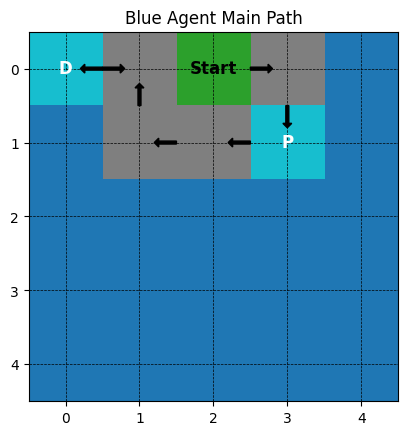

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the grid size
GRID_SIZE = 5

# Function to visualize the agent's path
def visualize_path(path):
    # Create a grid
    grid = np.zeros((GRID_SIZE, GRID_SIZE))

    # Mark starting point
    start = path[0]
    grid[start[0], start[1]] = 1

    # Draw arrows and color cells
    for i in range(1, len(path)):
        prev_state = path[i-1]
        curr_state = path[i]
        dx = curr_state[1] - prev_state[1]
        dy = curr_state[0] - prev_state[0]
        if dx == 1:
            arrow = patches.Arrow(curr_state[1] - 0.5, curr_state[0], 0.3, 0, width=0.2, color='black')
            plt.gca().add_patch(arrow)
            grid[curr_state[0], curr_state[1]] = 3
        elif dx == -1:
            arrow = patches.Arrow(curr_state[1] + 0.5, curr_state[0], -0.3, 0, width=0.2, color='black')
            plt.gca().add_patch(arrow)
            grid[curr_state[0], curr_state[1]] = 3
        elif dy == 1:
            arrow = patches.Arrow(curr_state[1], curr_state[0] - 0.5, 0, 0.3, width=0.2, color='black')
            plt.gca().add_patch(arrow)
            grid[curr_state[0], curr_state[1]] = 3
        elif dy == -1:
            arrow = patches.Arrow(curr_state[1], curr_state[0] + 0.5, 0, -0.3, width=0.2, color='black')
            plt.gca().add_patch(arrow)
            grid[curr_state[0], curr_state[1]] = 3

    # Mark additional points
    points = [(1, 3, 'P'), (0, 0, 'D')]
    for point in points:
        x, y, label = point
        grid[x, y] = 5
        # Change text color for points 'P' and 'D' to white
        text_color = 'white' if label in ['P', 'D'] else 'black'
        plt.text(y, x, label, fontsize=12, ha='center', va='center', color=text_color, weight = 'bold')

    # Add start point marker
    start_marker = patches.Circle((start[1], start[0]), radius=0.1, color='blue')
    # Add start point label
    plt.text(start[1], start[0], 'Start', fontsize=12, ha='center', va='center', color='Black', weight = 'bold')

    # Set colors for visualization
    cmap = plt.cm.get_cmap('tab10', 5)

    # Visualize the grid
    plt.imshow(grid, cmap=cmap, interpolation='nearest')

    plt.title("Black Agent Main Path")

    # Add gridlines
    plt.grid(visible=True, color='black', linestyle='--', linewidth=0.5)

    plt.show()

# Example path
black_path = [(0, 2), (0, 3), (1, 3), (1, 2), (1, 1), (0, 1), (0, 0), (0, 1)]
visualize_path(black_path)

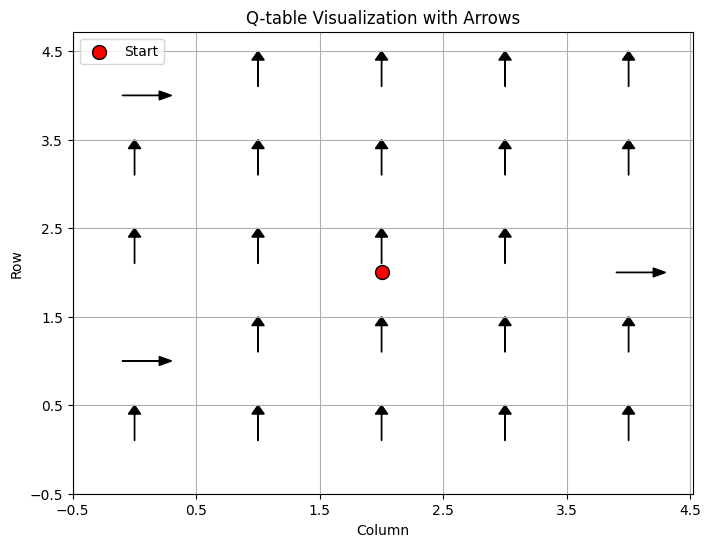

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Define actions
actions = ['North', 'East', 'South', 'West', 'Pickup', 'Dropoff']

# Define the Q-table values
q_table = [
    [0.00, 0.00, -0.73, 0.00, -0.76, -1.00],
    [0.00, 0.00, -0.77, -1.26, -0.93, -1.28],
    [0.00, 0.00, -0.77, -1.29, -0.93, -1.26],
    [3.82, 0.00, -0.81, -1.31, -0.93, -1.30],
    [0.00, 0.00, -0.66, -1.00, -0.76, 0.00],
    [0.00, 3.90, -0.51, 0.00, -0.66, -1.00],
    [0.00, 0.00, -0.55, -1.25, -0.78, -1.24],
    [0.00, 0.00, -0.55, -1.24, -0.78, -1.25],
    [0.00, 0.00, -0.60, -1.25, -0.78, -1.30],
    [0.00, 0.00, -0.51, -1.00, -0.66, 0.00],
    [0.00, 0.00, -0.30, 0.00, -0.51, -1.00],
    [0.00, 0.00, -0.30, -1.29, -0.62, -1.28],
    [0.00, 0.00, -0.30, -1.28, -0.62, -1.29],
    [0.00, 0.00, -0.30, -1.29, -0.62, -1.29],
    [0.00, 3.90, -0.30, -1.00, -0.51, 0.00],
    [0.00, 0.00, 0.00, 0.00, -0.30, -1.00],
    [3.75, 0.00, 0.00, -1.31, -0.45, -1.40],
    [0.00, 0.00, 0.00, -1.40, -0.45, -1.41],
    [0.00, 0.00, 0.00, -1.42, -0.45, -1.37],
    [0.00, 0.00, 0.00, -1.00, -0.30, 0.00],
    [0.00, 3.79, -0.81, 0.00, 0.00, -1.00],
    [0.00, 0.00, -0.98, -1.34, 0.00, -1.34],
    [0.00, 0.00, -0.98, -1.34, 0.00, -1.32],
    [0.00, 0.00, -1.01, -1.41, 0.00, -1.32],
    [3.79, 0.00, -0.76, -1.00, 0.00, 0.00]
]

# Define the grid size
grid_size = (5, 5)

# Reshape the Q-table into a grid
q_grid = np.array(q_table).reshape(grid_size + (6,))

# Define the starting location
start_location = (2, 2)

# Create a grid plot
plt.figure(figsize=(8, 6))

# Iterate over each cell in the grid
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        # Get the Q-values for the current state
        q_values = q_grid[i, j, :]
        # Get the action with the highest Q-value
        max_action_index = np.argmax(q_values)
        max_action = actions[max_action_index]
        # Plot arrow based on the action
        if max_action == 'North':
            plt.arrow(j, i+0.1, 0, 0.3, head_width=0.1, head_length=0.1, fc='k', ec='k')
        elif max_action == 'East':
            plt.arrow(j-0.1, i, 0.3, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
        elif max_action == 'South':
            plt.arrow(j, i-0.1, 0, -0.3, head_width=0.1, head_length=0.1, fc='k', ec='k')
        elif max_action == 'West':
            plt.arrow(j+0.1, i, -0.3, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')

# Mark the starting location
plt.scatter(start_location[1], start_location[0], color='red', s=100, edgecolors='black', label='Start')

# Add labels and legend
plt.title('Q-table Visualization with Arrows')
plt.xlabel('Column')
plt.ylabel('Row')
plt.legend()

plt.grid(True)
plt.xticks(np.arange(-0.5, 5, 1))
plt.yticks(np.arange(-0.5, 5, 1))

plt.show()

